In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re 
from datetime import datetime 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import unicodedata
import spacy
from nltk.probability import FreqDist
import seaborn as sns
from collections import Counter
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DSMA/Zara_tweets.csv')
df 

,Unnamed: 0,Date,User,Tweet
0,0,2022-11-17 17:19:15+00:00,ZARA,Rain boot Water resistant TRETORN X ZARA https...
1,1,2022-11-10 18:00:14+00:00,ZARA,ZARA SRPLS. COLLECTION 09. Urban toughness an...
2,2,2022-11-10 14:00:24+00:00,ZARA,ZARA SRPLS. COLLECTION 09. For the season ahea...
3,3,2022-11-10 08:00:19+00:00,ZARA,ZARA SRPLS. COLLECTION 09. A freshly elevated ...
4,4,2022-11-09 17:00:13+00:00,ZARA,Get ready for the party https://t.co/uxod658Cb...
...,...,...,...,...
3131,3131,2011-08-09 15:00:08+00:00,ZARA,Fall Winter 2011 YOUNG #ZARACampaign http://t...
3132,3132,2011-08-09 08:55:13+00:00,ZARA,Fall Winter 2011 TRF #ZARACampaign http://bit....
3133,3133,2011-08-05 15:00:17+00:00,ZARA,KIDS Fall Winter 2011 #ZARACampaign Video http...
3134,3134,2011-08-04 15:49:24+00:00,ZARA,MAN #ZARACampaign Fall Winter 2011 http://bit...


In [3]:
df = df.drop(['Unnamed: 0','User'],axis = 1)
df.head()

,Date,Tweet
0,2022-11-17 17:19:15+00:00,Rain boot Water resistant TRETORN X ZARA https...
1,2022-11-10 18:00:14+00:00,ZARA SRPLS. COLLECTION 09. Urban toughness an...
2,2022-11-10 14:00:24+00:00,ZARA SRPLS. COLLECTION 09. For the season ahea...
3,2022-11-10 08:00:19+00:00,ZARA SRPLS. COLLECTION 09. A freshly elevated ...
4,2022-11-09 17:00:13+00:00,Get ready for the party https://t.co/uxod658Cb...


## 1. Extracting Keywords using KeyWord BERT

In [4]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.4 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23800 sha256=597f97733c5ddcf981557fbd783b533f36e6de2abaa211fe830243cbb85800a0
  Stored in directory: /root/.cache/pip/wheels/6c/bc/8b/a51bee77aec33895e6c8c236144b4cc10875659c4d2c80f070
 

In [5]:
from keybert import KeyBERT

In [2]:
#function
def preprocessing(text):
    stop = nltk.corpus.stopwords.words('english') 
    stop = stop + ['zara','new','collection','available','dress','check'] 
    lem = WordNetLemmatizer()                                                        #initializing lemmatizer
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore')            #ignoring unicode data
    .decode('utf-8', 'ignore')
    .lower())
    text = re.sub("#[A-Za-z0-9_]+","", text)                                                                        #lower-casing
    words = re.sub(r'[^\w\s]', '', text).split()
    return [lem.lemmatize(w) for w in words if w not in stop]                        #returning words not in stopwords

In [7]:
df['Tweet'] = df['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'#\S+', '', regex=True).replace(r'@\S+', '', regex=True)

In [8]:
df['text']=df.apply(lambda x: preprocessing(x['Tweet']), axis=1) 
def final(lem_col):
    return (" ".join(lem_col))                                                       #applying the function to a text column                                  

df['text'] = df.apply(lambda x: final(x['text']),axis=1)

In [9]:
df['text']

0                     rain boot water resistant tretorn x
1       srpls 09 urban toughness urbane sleekness evok...
2       srpls 09 season ahead zaras capsule devoted in...
3       srpls 09 freshly elevated exploration clothing...
4                                         get ready party
                              ...                        
3131                               fall winter 2011 young
3132                                 fall winter 2011 trf
3133                           kid fall winter 2011 video
3134                                 man fall winter 2011
3135                               fall winter 2011 woman
Name: text, Length: 3136, dtype: object

In [10]:
words = preprocessing(''.join(str(df['Tweet'].tolist())))  # for bigrams, used in next section
words

['rain',
 'boot',
 'water',
 'resistant',
 'tretorn',
 'x',
 'zaraxa0',
 'srpls',
 '09',
 'urban',
 'toughness',
 'urbane',
 'sleekness',
 'evoked',
 'via',
 'zipper',
 'transparency',
 'hardware',
 'punctuate',
 'refined',
 'detaildriven',
 'wardrobe',
 'staple',
 'hero',
 'piece',
 'srpls',
 '09',
 'season',
 'ahead',
 'zaras',
 'capsule',
 'devoted',
 'intersection',
 'fashion',
 'function',
 'build',
 'utilitarian',
 'foundation',
 'unlock',
 'fresh',
 'mode',
 'worn',
 'expression',
 'srpls',
 '09',
 'freshly',
 'elevated',
 'exploration',
 'clothing',
 'universal',
 'code',
 'get',
 'ready',
 'party',
 'ready',
 'party',
 'party',
 'celebrate',
 'style',
 'party',
 'party',
 'discover',
 'party',
 'srpls',
 '09',
 'urban',
 'toughness',
 'urbane',
 'sleekness',
 'evoked',
 'via',
 'zipper',
 'transparency',
 'hardware',
 'punctuate',
 'refined',
 'detaildriven',
 'wardrobe',
 'staple',
 'hero',
 'piece',
 'srpls',
 '09',
 'season',
 'ahead',
 'zaras',
 'capsule',
 'devoted',
 'in

In [11]:
# Instantiate
kw_model = KeyBERT()
# Extract keywords
keywords = df['text'].apply(kw_model.extract_keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

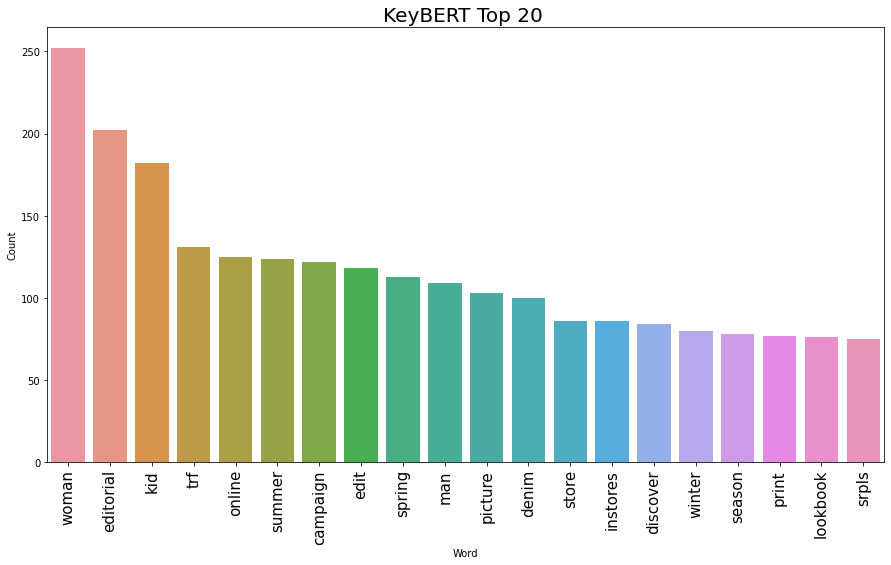

In [12]:
# Extract keywords from the KeyBERT output
text = []
for list in keywords:
    for component in list:
        text.append(str(component[0]))

# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')

# Plot a bar chart of the most common 20 words
plt.figure(figsize=(15,8)) 
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical',fontsize = 15)
plt.title("KeyBERT Top 20 ", fontsize = 20)
plt.show()

### Bigrams & Trigrams

In [13]:
# Bigrams

bigram = (pd.Series(nltk.ngrams(words,2)).value_counts())[:13]
bigram

(spring, summer)       95
(online, instores)     66
(woman, editorial)     61
(direction, fabien)    53
(coming, soon)         47
(sale, start)          41
(fabien, baron)        41
(director, fabien)     35
(karl, templer)        34
(woman, studio)        33
(steven, meisel)       31
(autumn, winter)       31
(start, today)         30
dtype: int64

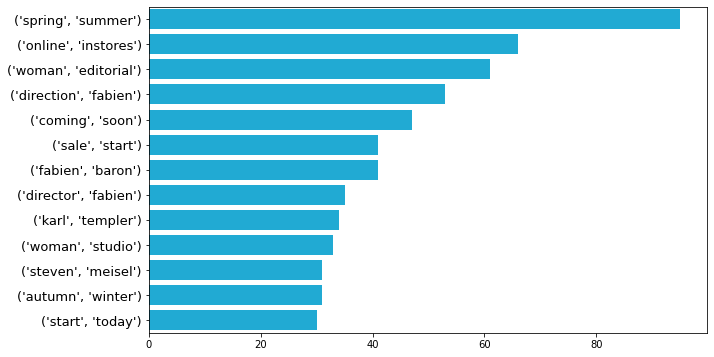

In [14]:
plt.figure(figsize=(10,6)) 
sns.barplot(bigram.values,bigram.index,orient="h",color="#04BAF0")
plt.yticks(fontsize = 13)
plt.show()

In [15]:
# Trigrams

trigram = (pd.Series(nltk.ngrams(words,3)).value_counts())[:10]
trigram

(sale, start, today)                      29
(director, fabien, baron)                 28
(direction, fabien, baronnphotographs)    26
(editorial, online, instores)             22
(woman, spring, summer)                   21
(spring, summer, 2018)                    19
(studio, fall, 21)                        18
(ncreative, direction, fabien)            17
(ecologically, grown, cotton)             17
(fabien, baronnstylist, karl)             16
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

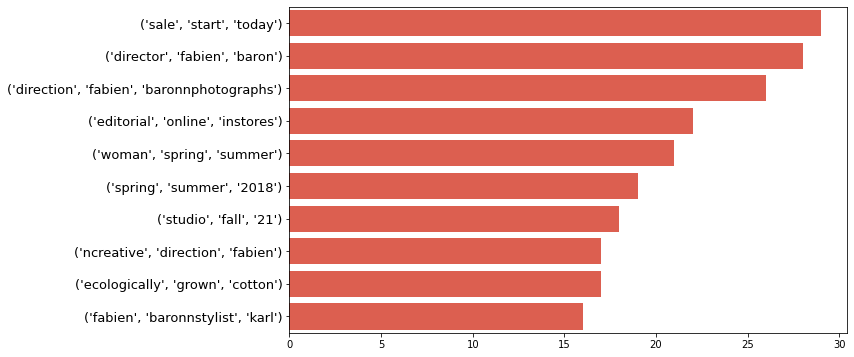

In [16]:
#trigram.plot.barh()
plt.figure(figsize=(10,6)) 
sns.barplot(trigram.values,trigram.index,orient="h",color="#F34D39")
plt.yticks(fontsize = 13)

## 2. Extracting Hashtags 

In [17]:
hashtags = pd.read_csv('/content/drive/MyDrive/DSMA/Zara_tweets.csv') 
hashtags

,Unnamed: 0,Date,User,Tweet
0,0,2022-11-17 17:19:15+00:00,ZARA,Rain boot Water resistant TRETORN X ZARA https...
1,1,2022-11-10 18:00:14+00:00,ZARA,ZARA SRPLS. COLLECTION 09. Urban toughness an...
2,2,2022-11-10 14:00:24+00:00,ZARA,ZARA SRPLS. COLLECTION 09. For the season ahea...
3,3,2022-11-10 08:00:19+00:00,ZARA,ZARA SRPLS. COLLECTION 09. A freshly elevated ...
4,4,2022-11-09 17:00:13+00:00,ZARA,Get ready for the party https://t.co/uxod658Cb...
...,...,...,...,...
3131,3131,2011-08-09 15:00:08+00:00,ZARA,Fall Winter 2011 YOUNG #ZARACampaign http://t...
3132,3132,2011-08-09 08:55:13+00:00,ZARA,Fall Winter 2011 TRF #ZARACampaign http://bit....
3133,3133,2011-08-05 15:00:17+00:00,ZARA,KIDS Fall Winter 2011 #ZARACampaign Video http...
3134,3134,2011-08-04 15:49:24+00:00,ZARA,MAN #ZARACampaign Fall Winter 2011 http://bit...


In [18]:
hashes = pd.DataFrame(hashtags.Tweet.str.extractall(r'(\#\w+)')[0].value_counts()).head(25).reset_index()
hashes.rename(columns = {'index':'hashtags'},inplace = True)

In [19]:
hashes

,hashtags,0
0,#zaradaily,218
1,#zaranewin,171
2,#woman,160
3,#aw15,104
4,#zarapictures,88
5,#zarawoman,83
6,#aw14,81
7,#zaraeditorials,79
8,#zaraeditorial,78
9,#zarakids,73


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

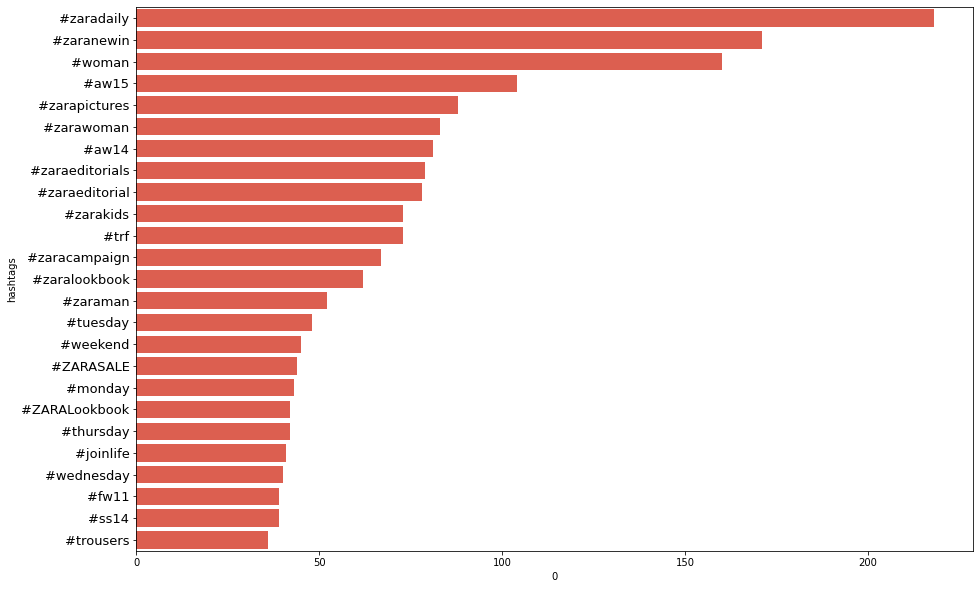

In [20]:
plt.figure(figsize=(15,10)) 
sns.barplot(hashes.iloc[:,1],hashes['hashtags'],orient="h",color="#F34D39")   
plt.yticks(fontsize = 13)  

## 3. Influencers

### 1. Tweet Count

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSMA/zara_influencers.csv')
df = df.drop('Unnamed: 0',axis = 1)
df 

,Date,User,Tweet,reply_count,retweet_count,like_count
0,2023-01-15 23:46:54+00:00,Mali_I_am,I really think I’m just not going to order fro...,0,0,0
1,2023-01-15 22:20:07+00:00,NessaTiller,@ZARA Please Make Klarna/Afterpay An Option Li...,0,0,0
2,2023-01-15 22:19:41+00:00,LiberaceGeechi,@ZARA get y’all fucking shit together these l...,0,0,0
3,2023-01-15 21:04:59+00:00,ZARA,"@ieruje Hello, thanks for your interest in our...",0,0,0
4,2023-01-15 20:56:13+00:00,PickeringBrunel,@ZARA I also found a small cut in the right sh...,1,0,0
...,...,...,...,...,...,...
34460,2022-01-16 05:21:47+00:00,da_ista,Details @HELMUTLANG @Margiela @ZARA @HudsonJea...,0,0,0
34461,2022-01-16 04:47:16+00:00,BhaktiPChavda,You know the clothes you've bought are good wh...,0,0,2
34462,2022-01-16 03:11:12+00:00,tanveermalik27,Be yourself 😎 who else is better qualified ..?...,0,0,0
34463,2022-01-16 02:21:29+00:00,E7Flux,Appalled @ the poor custmr serv I didn't recei...,1,0,1


In [23]:
df.User.value_counts()[1:].head(15)

BoyBoygattu15      624
TheSocialCTV        93
sunnyfernandes      56
Mike_Martin1        56
thehandbooknews     47
Ridhima83338634     44
CocoandVera         39
ZARA_Care           36
BOACHIE_            36
Ruchi4Tweets        35
GilmoreTee          34
daliagur            29
freedomunitedHQ     29
ecotextile          26
LawcockJulie        25
Name: User, dtype: int64

- https://twitter.com/CocoandVera
- https://twitter.com/GilmoreTee

### 2. Like Count

In [24]:
influencer_likes = df.groupby('User',as_index = False)['like_count'].mean().sort_values('like_count',ascending = False).head(15) 
influencer_likes

,User,like_count
5271,Lesdoggg,4098.00
8745,StudioMDHR,3063.00
2076,Crypto_Ciara,2525.00
782,AnshumanSail,2481.00
882,AshikaRanganath,2454.00
7945,SRuhle,1813.00
5137,Lane_Kiffin,1664.00
12896,esshanya_s,1041.00
19467,whatwinwears_,1029.00
4990,KrisJenner,930.00


- https://twitter.com/Lesdoggg
- https://twitter.com/StudioMDHR
- https://twitter.com/AshikaRanganath
- https://twitter.com/SRuhle
- https://twitter.com/KrisJenner
- https://twitter.com/Rhianmarie
- https://twitter.com/thereallisaann
- https://twitter.com/seangarrette

### 3. Reply Count

In [25]:
reply = df.groupby('User',as_index = False)['reply_count'].sum().sort_values('reply_count',ascending = False)[1:].head(15) 
reply

,User,reply_count
14883,khloekardashian,240
15375,lloydsceatspage,226
9163,TheSocialCTV,208
5271,Lesdoggg,192
7945,SRuhle,153
2987,FawadHazan,116
6296,Moniquerm50,91
4990,KrisJenner,86
8745,StudioMDHR,78
18890,thereallisaann,72


- https://twitter.com/khloekardashian
- https://twitter.com/lloydsceatspage
- https://twitter.com/TheSocialCTV
- https://twitter.com/beverleyturner


### 4. Retweet Count

In [26]:
reply = df.groupby('User',as_index = False)['retweet_count'].sum().sort_values('retweet_count',ascending = False).head(15) 
reply 

,User,retweet_count
11532,brightworeit,2990
9947,ZARA,1651
2987,FawadHazan,1461
12294,davidsheen,1046
19467,whatwinwears_,814
782,AnshumanSail,604
8745,StudioMDHR,517
9704,WRNWales,501
17127,ppkritstyle,442
13552,hcj_my,343


- https://twitter.com/WomensRightsNet

## 4. Conversation Surrounding the Brand

- Topic Modelling using BERT Topic 
- Sentimental Analysis of Tweet
- Word Cloud
- Monthly Mentions 

### Topic Modelling

In [13]:
df = pd.read_csv('/content/drive/MyDrive/DSMA/zara_influencers.csv')
df

,Unnamed: 0,Date,User,Tweet,reply_count,retweet_count,like_count
0,0,2023-01-15 23:46:54+00:00,Mali_I_am,I really think I’m just not going to order fro...,0,0,0
1,1,2023-01-15 22:20:07+00:00,NessaTiller,@ZARA Please Make Klarna/Afterpay An Option Li...,0,0,0
2,2,2023-01-15 22:19:41+00:00,LiberaceGeechi,@ZARA get y’all fucking shit together these l...,0,0,0
3,3,2023-01-15 21:04:59+00:00,ZARA,"@ieruje Hello, thanks for your interest in our...",0,0,0
4,4,2023-01-15 20:56:13+00:00,PickeringBrunel,@ZARA I also found a small cut in the right sh...,1,0,0
...,...,...,...,...,...,...,...
34460,34460,2022-01-16 05:21:47+00:00,da_ista,Details @HELMUTLANG @Margiela @ZARA @HudsonJea...,0,0,0
34461,34461,2022-01-16 04:47:16+00:00,BhaktiPChavda,You know the clothes you've bought are good wh...,0,0,2
34462,34462,2022-01-16 03:11:12+00:00,tanveermalik27,Be yourself 😎 who else is better qualified ..?...,0,0,0
34463,34463,2022-01-16 02:21:29+00:00,E7Flux,Appalled @ the poor custmr serv I didn't recei...,1,0,1


In [4]:
df = df.drop(['Unnamed: 0','User'],axis = 1)
df.head()

,Date,Tweet,reply_count,retweet_count,like_count
0,2023-01-15 23:46:54+00:00,I really think I’m just not going to order fro...,0,0,0
1,2023-01-15 22:20:07+00:00,@ZARA Please Make Klarna/Afterpay An Option Li...,0,0,0
2,2023-01-15 22:19:41+00:00,@ZARA get y’all fucking shit together these l...,0,0,0
3,2023-01-15 21:04:59+00:00,"@ieruje Hello, thanks for your interest in our...",0,0,0
4,2023-01-15 20:56:13+00:00,@ZARA I also found a small cut in the right sh...,1,0,0


In [14]:
df['Tweet'] = df['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'#\S+', '', regex=True).replace(r'@\S+', '', regex=True)

In [15]:
df['text']=df.apply(lambda x: preprocessing(x['Tweet']), axis=1) 
def final(lem_col):
    return (" ".join(lem_col))                                                       #applying the function to a text column                                  

df['text'] = df.apply(lambda x: final(x['text']),axis=1)

In [16]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=fd4202c459393bd5ca734a68b7041eedec62cae48dccb451cf4bae160151aa95
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [17]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens') 
embeddings = model.encode(df['Tweet'], show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/1078 [00:00<?, ?it/s]

In [18]:
!pip install umap-learn
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=2cab80a3d28e6cdbb84377c097ce50f6da2590094ed1fb05f9a68c40119ea398
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=6338ce1482585bd32bb9acd3ea440de58d28bddb0bbf420a0055f099420e42fa
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [44]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [45]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

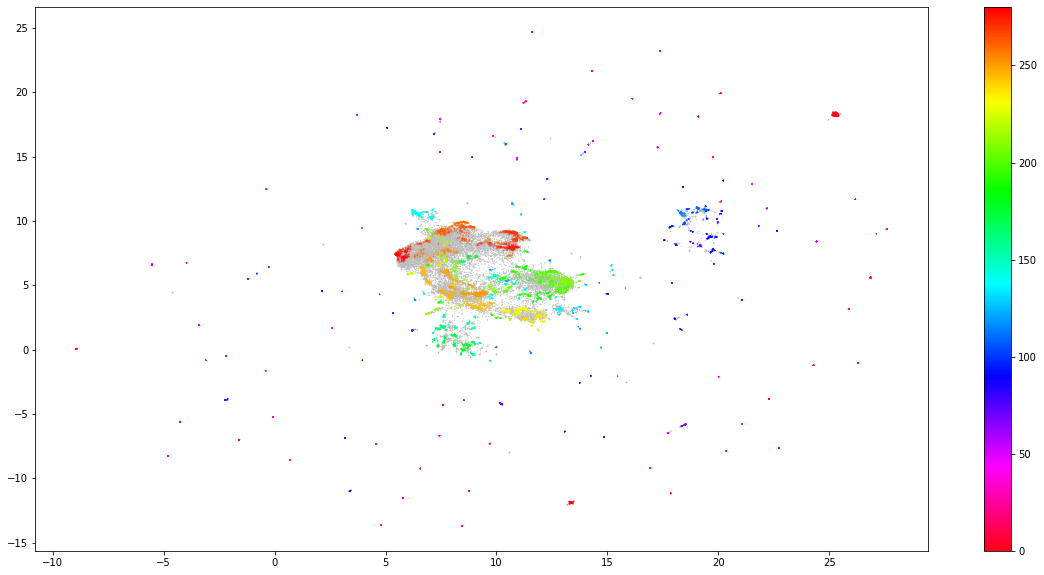

In [46]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [47]:
docs = pd.DataFrame(df, columns=["Tweet"])
docs['Topic'] = cluster.labels_
docs['Doc_ID'] = range(len(docs))
docs_per_topic = docs.groupby(['Topic'], as_index = False).agg({'Tweet': ' '.join})

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def tf_idf_(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = tf_idf_(docs_per_topic.Tweet.values, m=len(df))

In [49]:
def top_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = docs_per_topic.Topic.tolist()
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words 

def topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Tweet
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Tweet": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [50]:
top_n_words = top_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = topic_sizes(docs); topic_sizes.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Topic,Size
0,-1,19373
202,201,667
1,0,618
2,1,497
252,251,356
209,208,319
142,141,308
275,274,291
244,243,289
231,230,254


In [58]:
top_n_words[141][:10] 

[('russia', 0.3073880285771217),
 ('russian', 0.17611860539319418),
 ('ukraine', 0.10135506198908942),
 ('war', 0.09343304005924015),
 ('stores', 0.05782102473768864),
 ('ukrainian', 0.04825403851467881),
 ('shame', 0.047318146271073676),
 ('genocide', 0.046561070790000936),
 ('country', 0.04644345993081218),
 ('ukrainians', 0.04333344608574561)]

In [54]:
top_n_words[251][:10] 

[('shoes', 0.3857778156923739),
 ('dress', 0.20257394789629596),
 ('outfit', 0.1575226130542286),
 ('pants', 0.15219752398340208),
 ('bag', 0.11033741039874487),
 ('boots', 0.07495335318851355),
 ('mel', 0.07124119418220447),
 ('skirt', 0.07000743074896834),
 ('cynthia', 0.06974630092789087),
 ('lainey', 0.0670179471932509)]

### Sentiment Analysis

In [5]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.stem import SnowballStemmer
from nltk .sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [6]:
#Sentiment Scores

sent_analyzer = SentimentIntensityAnalyzer()
cs = []
def senti(text):
    for row in range(len(df)):
        cs.append(sent_analyzer.polarity_scores((text).iloc[row])['compound'])

senti(df['Tweet'])
df['sentiment_score'] = cs
sentiment = df[(df[['sentiment_score']] != 0).all(axis=1)].reset_index(drop=True)
sentiment['sentiment_score'] 

0        0.3182
1       -0.7645
2        0.7814
3       -0.2263
4        0.5719
          ...  
26199    0.6478
26200    0.6696
26201    0.9412
26202    0.4404
26203   -0.5255
Name: sentiment_score, Length: 26204, dtype: float64

In [7]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26204 entries, 0 to 26203
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             26204 non-null  object 
 1   Tweet            26204 non-null  object 
 2   reply_count      26204 non-null  int64  
 3   retweet_count    26204 non-null  int64  
 4   like_count       26204 non-null  int64  
 5   sentiment_score  26204 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [8]:
#changing the date column to date format to extract month

sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment['month'] = sentiment['Date'].dt.month
sentiment

,Date,Tweet,reply_count,retweet_count,like_count,sentiment_score,month
0,2023-01-15 22:20:07+00:00,@ZARA Please Make Klarna/Afterpay An Option Li...,0,0,0,0.3182,1
1,2023-01-15 22:19:41+00:00,@ZARA get y’all fucking shit together these l...,0,0,0,-0.7645,1
2,2023-01-15 21:04:59+00:00,"@ieruje Hello, thanks for your interest in our...",0,0,0,0.7814,1
3,2023-01-15 20:56:13+00:00,@ZARA I also found a small cut in the right sh...,1,0,0,-0.2263,1
4,2023-01-15 20:15:09+00:00,"@juliefalbo Hello, we regret to hear this. If ...",0,0,0,0.5719,1
...,...,...,...,...,...,...,...
26199,2022-01-16 10:12:35+00:00,@ZarahTheQwin @uzomacprecious1 @gaajii_ So gor...,0,0,0,0.6478,1
26200,2022-01-16 06:16:51+00:00,@JessicaBanxx @MsGraceGrey @BlackLotusPhoto @T...,0,0,0,0.6696,1
26201,2022-01-16 04:47:16+00:00,You know the clothes you've bought are good wh...,0,0,2,0.9412,1
26202,2022-01-16 03:11:12+00:00,Be yourself 😎 who else is better qualified ..?...,0,0,0,0.4404,1


In [9]:
# computing the average sentiment of each month

monthly_sentiment = sentiment.groupby('month',as_index = False)['sentiment_score'].mean().sort_values('sentiment_score', ascending = False)
monthly_sentiment

,month,sentiment_score
2,3,0.320908
1,2,0.278980
5,6,0.276431
11,12,0.223743
6,7,0.210612
0,1,0.205914
10,11,0.205897
8,9,0.202109
9,10,0.161215
3,4,0.145343


In [10]:
import plotly.graph_objects as go
import plotly.express as px

#plotting a bar chart

fig = go.Figure(
    data=[go.Bar(x = monthly_sentiment.month, y=monthly_sentiment['sentiment_score'])],
    layout_title_text="Monthly Aggregate Sentiment"
)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

### Word Cloud

In [38]:
from wordcloud import WordCloud, STOPWORDS

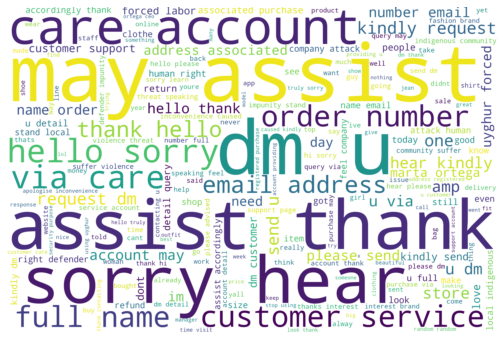

In [39]:
text = df.text.tolist() 
text = ' '.join(text)
# stop_words = ["Zara"] + list(STOPWORDS)


wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',width= 3000, height = 2000,
                      collocations=True).generate(text)
plt.figure(figsize=(10,6)) 
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### Monthly Mentions

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['month'] = df.Date.dt.month

In [6]:
mentions = df.groupby('month',as_index = False)['Tweet'].count().sort_values(by = 'Tweet',ascending = False)
mentions

,month,Tweet
4,5,3557
6,7,3528
11,12,3076
3,4,2906
0,1,2832
2,3,2810
5,6,2802
9,10,2798
7,8,2792
10,11,2538


In [17]:
mentions = mentions.sort_values('month')
mentions

,month,Tweet
0,1,2832
1,2,2313
2,3,2810
3,4,2906
4,5,3557
5,6,2802
6,7,3528
7,8,2792
8,9,2513
9,10,2798


In [20]:
import plotly.express as px

df = mentions
fig = px.line(df, x="month", y="Tweet", title='Mentions')
fig.show()